# Analysis of College Graduate Data 



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from collegetools import gender_tool as gt
from collegetools.rateplot import combine2table, employment_rate_table, plotting_trend, filter_major_category
from collegetools.grad_vs_nongrad import plot_programs, best_programs, groupby_major_category, best_premiums, worst_premiums, plot_rankings

year_lst = ["2010", "2012", "2014", "2016", "2018"]
filetype = 'png'

## Data 

This notebook presents several analyses of college outcomes by major. The original data that inspired the project comes from a [FiveThirtyEight article](https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/) and the associated [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors). The original American Community Survey (ACS) Public Use Microdata Sample (PUMS) were downloaded from [here](https://www.census.gov/programs-surveys/acs/microdata/access.html), for the years: 2010, 2012, 2014, 2016, and 2018.  

## Employment Trends by Major Categories

In [2]:
employment_rate_df = pd.read_csv("data/pums/processed/employment_rate_processed.csv")
employment_rate_df.head()

,Biology & Life Science,Business,Computers & Mathematics,Education,Engineering,Health,Humanities & Liberal Arts,Physical Sciences,Social Science
0,87.153285,90.271226,89.638932,92.540323,90.336134,87.867647,88.072122,87.810384,87.816307
1,87.136929,89.277523,88.727858,92.506460,91.549296,91.449814,88.503401,87.616822,88.547486
2,89.120715,88.256441,91.743119,90.450928,93.349456,90.725806,87.914517,85.989011,89.548023
3,88.154613,89.851076,90.942928,91.666667,91.420118,90.353698,87.981711,89.195980,87.190083
4,89.912281,89.267849,90.605428,90.799031,93.387681,90.909091,88.801927,87.968442,88.619855


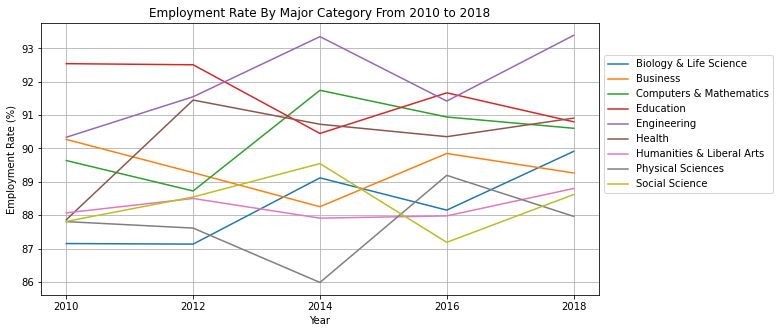

In [3]:
# plotting the employment rate trend
plotting_trend(employment_rate_df, "Employment Rate By Major Category From 2010 to 2018",\
               "Year", "Employment Rate (%)", year_lst, "employment_rate", filetype)

_By looking at the line plot above, we would only keep the major categories that have an increasing trend. They are Engineer, Biology & Life Science, Computers & Mathematics, and Health. The remaing major categories that have a stable trend are Humanities & Liberal Arts and Social Science. Therefore, major categories in Engineer, Biology & Life Science, Computers & Mathematics, Health, Humanities & Liberal Arts and Social Science trend to have a stable demand of jobs over time._

#### For those major categories with an grow trend, do they trend to have a higher salary?

In [4]:
avg_wage_per_hr = pd.read_csv("data/pums/processed/wage_rate_processed.csv")
avg_wage_per_hr.head()

,Biology & Life Science,Business,Computers & Mathematics,Education,Engineering,Health,Humanities & Liberal Arts,Physical Sciences,Social Science
0,35.365788,31.515714,38.470533,25.295402,41.407122,33.198900,26.721050,38.326263,31.284657
1,36.535036,32.580151,39.999740,24.989683,42.479781,32.839742,28.840995,40.861140,34.793060
2,41.709938,35.310154,43.205380,25.869538,44.255455,34.670630,28.757138,46.166471,33.622338
3,41.874489,37.292932,48.967641,25.483899,49.698466,35.889916,31.172684,50.832243,36.449952
4,46.205376,39.570840,53.636024,29.608283,54.137553,36.498900,32.966783,47.261912,39.498475


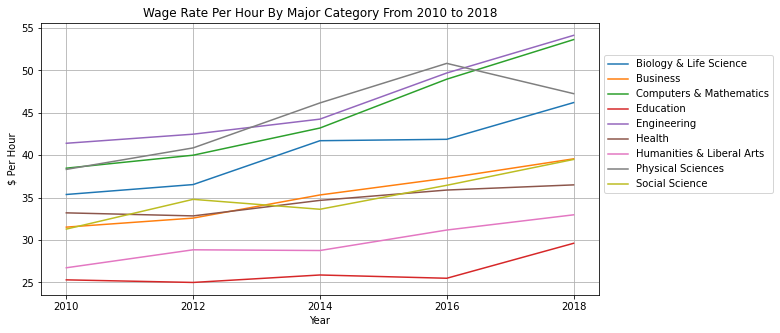

In [5]:
# plotting the rate rate trend
plotting_trend(avg_wage_per_hr, "Wage Rate Per Hour By Major Category From 2010 to 2018",\
               "Year", "$ Per Hour", year_lst, "wage_rate", filetype)

_From the above plot, we observed that all the major categories have a increasing trend over eight years. The major categories with a steady employment rate trend to have a higher salary increase than others except for the Health major category. However, this might due to bias that we treated everyone to have the same amount of work hours. At most of the time, people in health major category are most likely to have a longer work time than other career. Therefore, we would still conclude that there is correlation between employment rate and wage rate. Those major categories with an increasing trend or less variations trend to have a higher wage rate than those with high variation._

## Gender Income Equality in Recent College Graduates 

This section analyzed gender difference in median income for different majors among recent college graduates.

In [6]:
# Load recent_grads data from 2010 to 2018
recent_grads_10 = pd.read_csv("data/pums/processed/2010_recent_grad_stats_by_major.csv")
recent_grads_12 = pd.read_csv("data/pums/processed/2012_recent_grad_stats_by_major.csv")
recent_grads_14 = pd.read_csv("data/pums/processed/2014_recent_grad_stats_by_major.csv")
recent_grads_16 = pd.read_csv("data/pums/processed/2016_recent_grad_stats_by_major.csv")
recent_grads_18 = pd.read_csv("data/pums/processed/2018_recent_grad_stats_by_major.csv")

In [7]:
# Make a list of dataframes
recent_grads_raw = [recent_grads_10, recent_grads_12, recent_grads_14, recent_grads_16, recent_grads_18]

In [8]:
# Drop rows with N/A
recent_grads = [df[(df[['women median','men median']] > 0).all(axis=1)] for df in recent_grads_raw]

### Plotting the Overall Women and Men Income Across Time

In [9]:
# Calculate average median income of all majors respectively for women and men
women_avg_income = [np.mean(df['women median']) for df in recent_grads]
men_avg_income = [np.mean(df['men median']) for df in recent_grads]

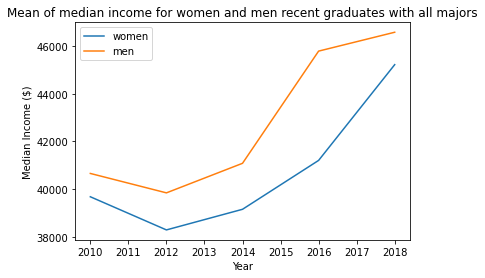

In [10]:
# Make a line plot showing the trend of averge income for women and men from 2010 to 2018
year = [2010, 2012, 2014, 2016, 2018]
plt.plot(year, women_avg_income, label = "women")
plt.plot(year, men_avg_income, label = "men")
plt.legend()
plt.xlabel('Year')
plt.ylabel('Median Income ($)')
plt.title("Mean of median income for women and men recent graduates with all majors")
plt.savefig('figures/overall_gender_income_difference.png')


This plot shows the average of median income for each major respectively for men and women. The income gap had persisted from 2010 to 2018, and expanded from 2010 to 2016, even though income of both groups have increased. 

### Gender Income Differences for Major

In [11]:
# Calculate how median income of each major of men exceed that of women of each year.

for df in recent_grads:
    df['median income diff (men - women)'] = df['men median'] - df['women median']

/tmp/ipykernel_3250/2445253670.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['median income diff (men - women)'] = df['men median'] - df['women median']


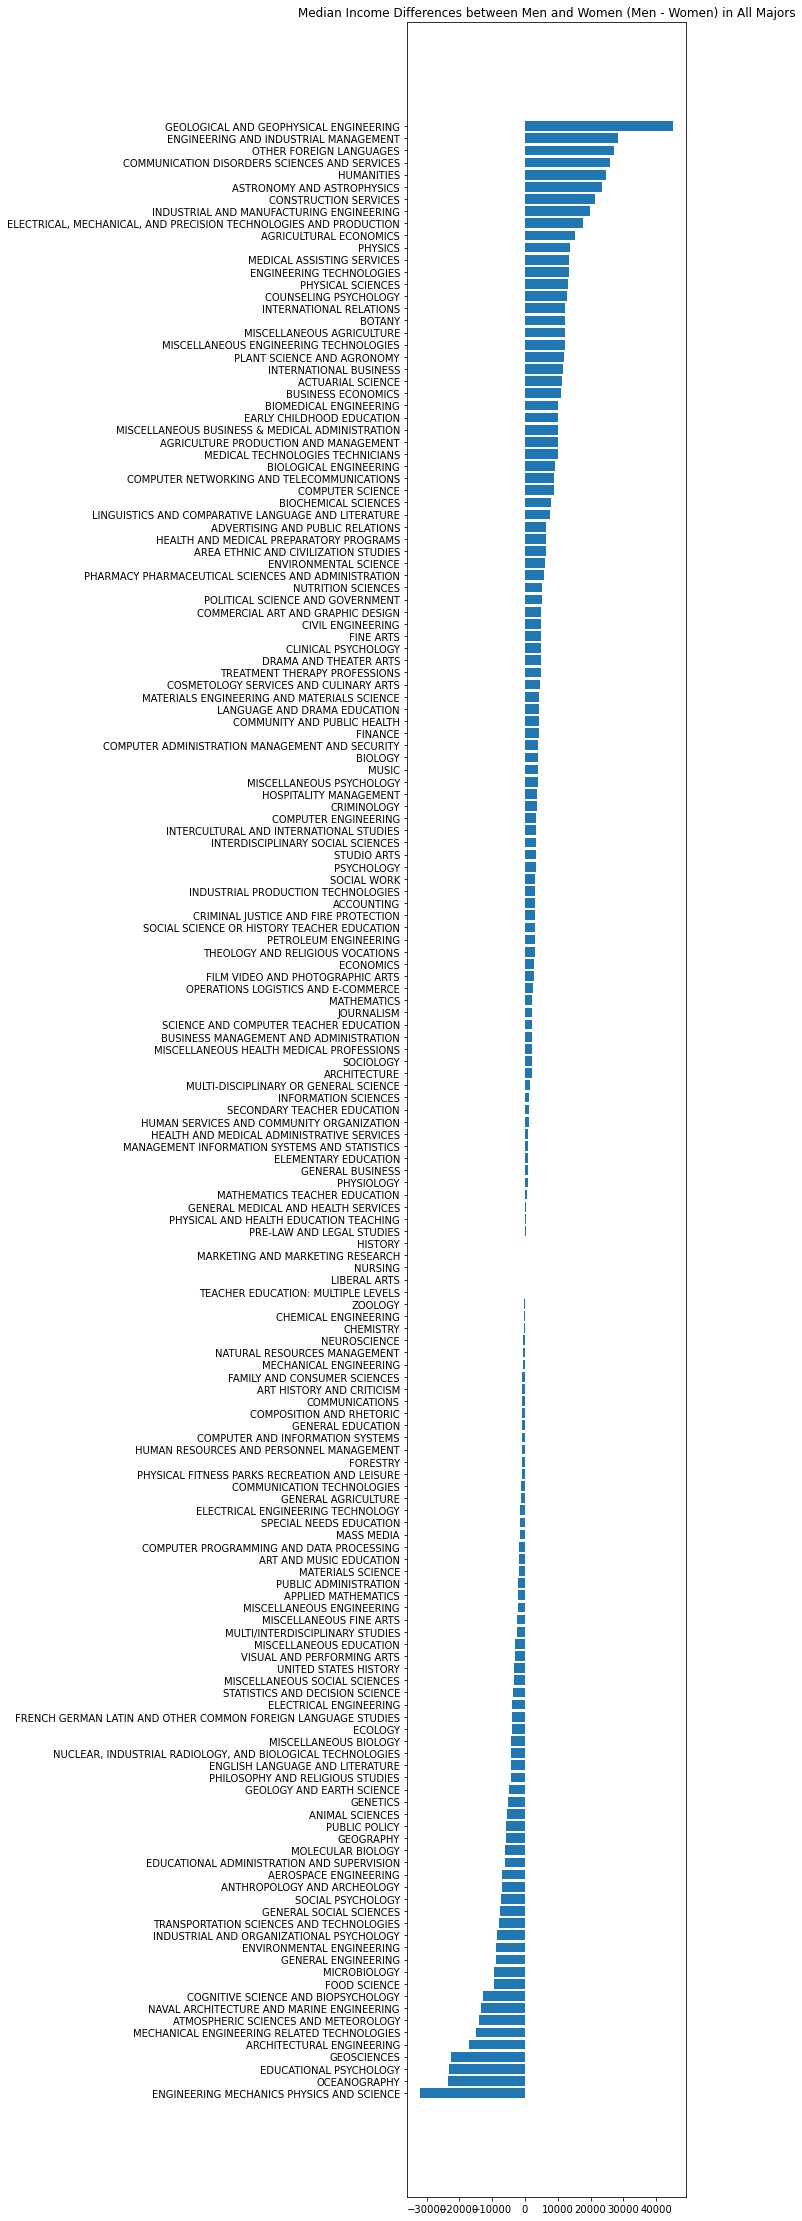

In [12]:
gt.plot_gender_income_diff(2014, recent_grads);

This plot shows the median income gap (men - women) for all majors in the given year. Mechanical engineering related technologies, pharmacology, and materials science are majors with women income significantly greater than men; while food science, miscellaneous fine arts, and mathematics and computer science are the ones with men income significant greater than women. Clinical psychology, English language and literature, accounting are some of those majors with smallest gender gap in income. 

### Gender Income Differences for Major Category

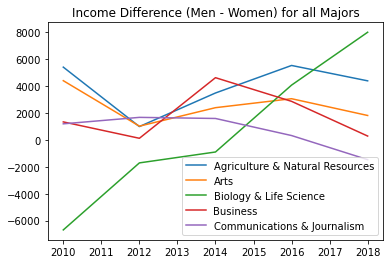

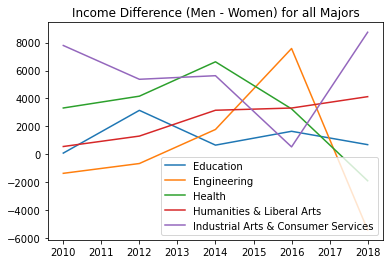

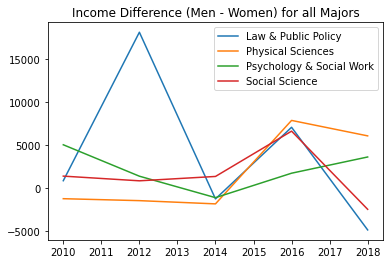

<Figure size 432x288 with 0 Axes>

In [13]:
# Creat line plots to show how gender gap in income changed for each major category over time
# This function can be found in gender_tool package
gt.plot_income_diff_category(recent_grads);

These three line plots show the trends of gender income differences for each major category. We can observe that most categories' income differences are above 0 throughout the years, which means the median earning of men are greater than women in most major categories. Also, there are more categories which had income differences decreasing, either toward zero or below zero, over time. This implies the gender gaps were becoming smaller, or favoring women. 

### Correlation Heatmap

In [14]:
# Add a column of "ShareWomen" to all dataframes, recording women ratio in all graduates.
dfs = [recent_grads_10, recent_grads_12, recent_grads_14, recent_grads_16, recent_grads_18]
for df in dfs:
    df['women_ratio'] = df['women'] / (df['men'] + df['women'])

In [15]:
recent_grads_10.columns

Index(['FOD1P', 'total', 'men', 'women', 'total median', 'women median',
       'men median', 'Major', 'Major_Category', 'women_ratio'],
      dtype='object')

In [16]:
# Select columns plotted by heatmap
heatmap_col = recent_grads_10[['total', 'men', 'women', 'total median', 'women median',
       'men median', 'Major', 'Major_Category', 'women_ratio']]

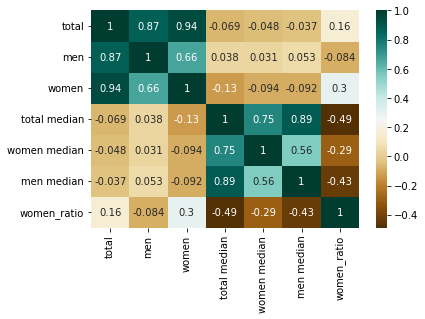

In [17]:
# Plot a heatmap showing the correlations between each columns
sns.heatmap(heatmap_col.corr(), cmap='BrBG', annot = True)
plt.savefig('figures/10_heatmap.png')

Interestingly, this heatmap shows negative correlations between women_ratio and median earning (total, women, and men). This implies the higher the ratio of women in a major, the less income would be earned by both women and men in that major. 

### Gender ratio and Median Earning

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/jovyan/envs/hw7env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


correlation coefficient between women ratio and median earning in 2010 equals to: -0.4900784927349607


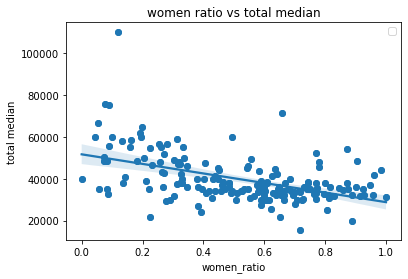

In [18]:
# Draw a scatter plot of women ratio vs. total median earning to see the correlation
gt.womenratio_median_scatter_plot(recent_grads_10, 2010);

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/jovyan/envs/hw7env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


correlation coefficient between women ratio and median earning in 2018 equals to: -0.5716854655416421


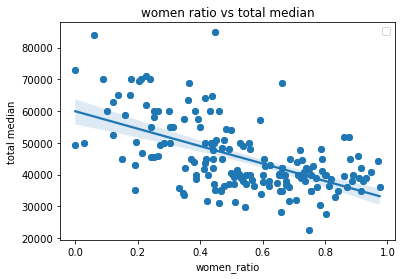

In [19]:
gt.womenratio_median_scatter_plot(recent_grads_18, 2018);

These plots compare the correlations between women ratio and total median earning in 2010 and 2018. Their respective correlation coeficients are -0.49 and -0.57, which means women ratio and total median earning were more correlated in 2018 than in 2016. 

## Graduate vs Non-Graduate Degree Analysis 

This section explores how a graduate degree compares to its nongrad degree in terms of median salary, employment rates, and salary volatility. The goal of this analysis is to assess the return on investment (ROI) of a graduate degree relative to its nongraduate degree.

In [20]:
path_pums = r'data/pums/processed/'
path_538 = f'data/fivethirtyeight/'

df_grad_students = pd.read_csv(path_538 + 'grad-students.csv')
df = pd.read_csv(path_pums + '2018_recent_grad_stats_by_major.csv')

df_worst_premiums = worst_premiums(df_grad_students)
df_best_premiums = best_premiums(df_grad_students)


## Analysing the Salary Premiums for Graduate Degrees

###### *Grad Salary Premium implies the percentage to which a grad degrees makes more than its undergraduate counterpart. For example, a Grad Premium of .15 implies that the graduate degree makes a median salary that is 15% higher than its undergraduate counterpart

#### Figure 1

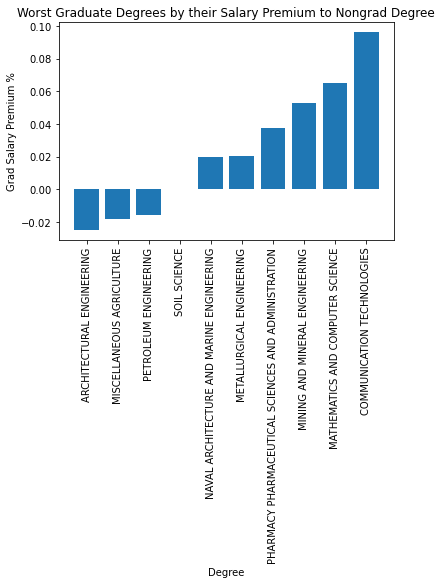

In [21]:
plot_rankings(df_worst_premiums)

Refering to Figure 1, you can see a list of the 10 worst graduate degrees in terms of their median salary relative to the undergraduate counterpart. As illustrated, three graduate degrees have negative salary premiums compared to their undergraduate counterpart, in other words, the median salary for the graduate degree is less than the median salary of the corresponding undergraduate degree. This is fairly counter-intuitive and it's difficult to assess whether this is due to fact that the data is vulnerable to a poor sample size being taken, or that there is a systemic reason for why graduate students in these majors have a lower median salary than their undergraduate counterparts. If it is the latter, one reason may be that their undergraduate counterparts have been in the workforce for a longer amount of years, and hence may have already earned work promotions that exceed the salaries of their graduate degree counterparts.

#### Figure 2

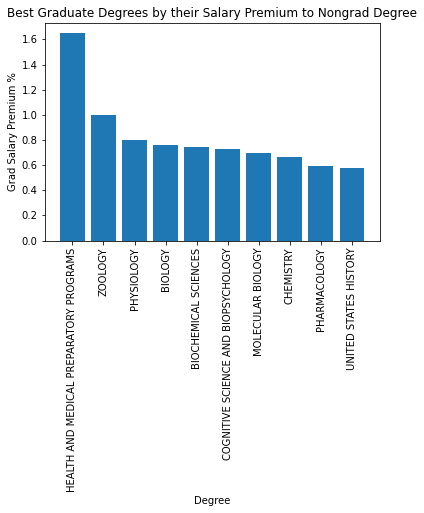

In [22]:
plot_rankings(df_best_premiums, False)

Refering to Figure 2, you can see a list of the 10 best graduate degrees in terms of their median salary relative to their undergraduate counterpart. Health and Medical Preparatory Programs vastly outweighs any of the graduate degrees, with a salary premium around 1.6 in comparison to its undergraduate degree. Given the high standards revolving around the education necessary to break into the health and medical industry, it is fairly intuitive why we would see a 160% increase in median salary between the graduate and undergraduate Health and Medical Preparatory Programs. A potentially suprising one was United States History, which ranked in at 10th. This reinforces the notion that many liberal arts studies see signficant salary increases with an advanced degree in comparison to an undergraduate degree. 

#### Figure 3

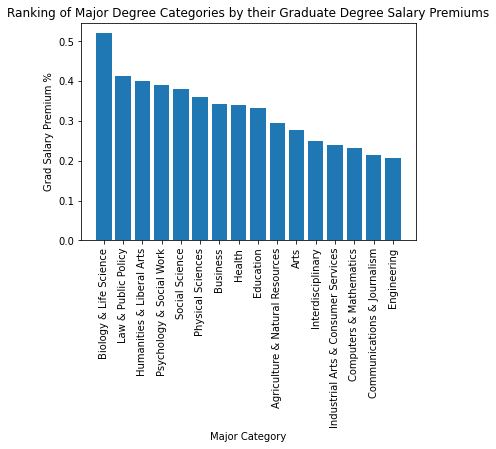

In [23]:
df_major_categories = groupby_major_category(df_grad_students)
df_best_major_categories = best_programs(df_major_categories).reset_index()
plot_programs(df_best_major_categories)

Figure 3 illustrates how each major categories' graduate degrees hold up with respect to their median salary premiums relative to the major categories' undergraduate counterpart. As exhibited, degrees in Biology and Life Science, as well as Law & Public Policy have the highest salary premiums in comparison to their undergraduate program counterparts, while Engineering has the lowest premium. Degrees in both of these programs are nearly universally considered to need their graduate degrees to land higher paying jobs. On the other hand, more computational degrees, for instance Engineering and Computers & Mathematics are among the bottom three major categories with respect to their graduate degree salary premiums. This further strengthens the case that undergraduate degrees in these programs provide high paying jobs directly out of their undergraduate programs and often do not require a graduate degree to experience a signficant salary increase, as their premius range around 20% increases in salary. Overall though, every major category expereinces a salary premium when acquiring its graduate degree with a minimum threshold of a 20% median increase salary. This highlights the value that graduate degrees offer in today's workforce.